# Geopandas
Principalmente es una extensión de la libreria pandas, que permite trabajar y analizar datos de forma práctica, Geopandas extiende esta funcionalidad para permitir operaciones espaciales en datos de tipo geométrico. Puede ser un gran sustituto para la base de datos PostGIS.

In [4]:
import geopandas

gdf1 = geopandas.read_file("geojsons/mx1.geojson")
gdf2 = geopandas.read_file("geojsons/mx3.geojson")

gdf1, gdf2

(                     geometry
 0  POINT (-99.13304 19.43331)
 1  POINT (-99.13615 19.43419)
 2  POINT (-99.13592 19.43544)
 3  POINT (-99.13775 19.43571)
 4  POINT (-99.14005 19.43604)
 5  POINT (-99.14149 19.43639)
 6  POINT (-99.14393 19.43572)
 7  POINT (-99.14652 19.43723),
                      geometry
 0   POINT (-99.13294 19.4334)
 1  POINT (-99.13515 19.43411)
 2  POINT (-99.13755 19.43438)
 3  POINT (-99.13984 19.43467)
 4  POINT (-99.14107 19.43424)
 5  POINT (-99.14402 19.43475)
 6  POINT (-99.14485 19.43629)
 7  POINT (-99.14652 19.43722))

## Cálculo de distancias con puntos de mismo tamaño

In [5]:
gdf1.distance(gdf2)

/tmp/ipykernel_26585/372816186.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf1.distance(gdf2)


0    0.000139
1    0.001007
2    0.001941
3    0.002334
4    0.002067
5    0.003017
6    0.001084
7    0.000014
dtype: float64

In [6]:
gdf1.hausdorff_distance(gdf2), gdf1.frechet_distance(gdf2)

/tmp/ipykernel_26585/1660621400.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'hausdorff_distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf1.hausdorff_distance(gdf2), gdf1.frechet_distance(gdf2)
/tmp/ipykernel_26585/1660621400.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'frechet_distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf1.hausdorff_distance(gdf2), gdf1.frechet_distance(gdf2)


(0    0.000139
 1    0.001007
 2    0.001941
 3    0.002334
 4    0.002067
 5    0.003017
 6    0.001084
 7    0.000014
 dtype: float64,
 0    0.000139
 1    0.001007
 2    0.001941
 3    0.002334
 4    0.002067
 5    0.003017
 6    0.001084
 7    0.000014
 dtype: float64)

# Shapely
Geopandas utiliza shapely directamente para realizar las operaciones geométricas. Shapely también puede cargar archivos GeoJSON y hacer el cálculo de las distancias:

- Euclideanas
- Hausdorff
- Frechet

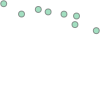

In [24]:
import json
import shapely

with open("geojsons/mx1.geojson") as f:
    geo1 = json.load(f)

with open("geojsons/mx3.geojson") as f:
    geo2 = json.load(f)

gc1 = shapely.from_geojson(json.dumps(geo1))
gc2 = shapely.from_geojson(json.dumps(geo2))

gc1

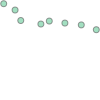

In [19]:
gc2

## Cálculo de distancias con puntos de mismo tamaño

In [20]:
shapely.distance(gc1, gc2)

1.350515095718982e-05

In [21]:
shapely.hausdorff_distance(gc1, gc2)

0.002195429667807937

In [22]:
shapely.frechet_distance(gc1, gc2)

0.002195429667807937

## Cálculo de distancias con puntos de distinto tamaño
Usando Geopandas y Shapely

In [28]:
gdf3 = geopandas.read_file("geojsons/mx2.geojson")

gdf1.distance(gdf3), gdf1.hausdorff_distance(gdf3), gdf1.frechet_distance(gdf3)

/tmp/ipykernel_26585/3370166338.py:3: UserWarning: The indices of the two GeoSeries are different.
  gdf1.distance(gdf3), gdf1.hausdorff_distance(gdf3), gdf1.frechet_distance(gdf3)
/tmp/ipykernel_26585/3370166338.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf1.distance(gdf3), gdf1.hausdorff_distance(gdf3), gdf1.frechet_distance(gdf3)
/tmp/ipykernel_26585/3370166338.py:3: UserWarning: The indices of the two GeoSeries are different.
  gdf1.distance(gdf3), gdf1.hausdorff_distance(gdf3), gdf1.frechet_distance(gdf3)
/tmp/ipykernel_26585/3370166338.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'hausdorff_distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf1.distance(gdf3), gdf1.hausdorff_distance(gdf3), gdf1.frechet_distance(gdf3)
/tmp/ipykernel_265

(0     0.000271
 1     0.000980
 2     0.002070
 3     0.001353
 4     0.001097
 5     0.000920
 6     0.001910
 7     0.002302
 8          NaN
 9          NaN
 10         NaN
 dtype: float64,
 0     0.000271
 1     0.000980
 2     0.002070
 3     0.001353
 4     0.001097
 5     0.000920
 6     0.001910
 7     0.002302
 8          NaN
 9          NaN
 10         NaN
 dtype: float64,
 0     0.000271
 1     0.000980
 2     0.002070
 3     0.001353
 4     0.001097
 5     0.000920
 6     0.001910
 7     0.002302
 8          NaN
 9          NaN
 10         NaN
 dtype: float64)

In [29]:
with open("geojsons/mx2.geojson") as f:
    geo3 = json.load(f)

gc3 = shapely.from_geojson(json.dumps(geo3))

shapely.distance(gc1, gc3), shapely.hausdorff_distance(gc1, gc3), shapely.frechet_distance(gc1, gc3)

(0.000270855242489912, 0.0015387486159673845, 0.001955097561137056)

## Complejidad
Shapely a su vez hace uso de una libreria escrita en C/C++ [GEOS](https://libgeos.org/) para realizar el cálculo de estas distancias y acorde a esta librería la complejidad puede variar de distintos factores tales como:

- La complejidad geométrica
- Implementación tanto en Shapely como en GEOS

No obstante, la complejidad de estos algoritmos son típicamente:

- Distancia euclideana: O(1)
- Distancia Hausdorff
    - O(n²) cuando la complejidad geométrica de ambas figuras es compleja y requiere de muchas comparaciones
    - O(nlogn) cuando no las figuras son más simples y hay optimizaciones implementadas
- Distancia Frechet: O(n²)